Before running this notebook, run this command in your terminal `pip install pylandtemp` or simply copy and paste this `!pip install pylandtemp` into a cell and run

# 1.  Import python dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import rasterio.plot
import rasterio

# 2. Location

For this tutorial, we’ll use the NIR and Red bands from a Landsat-8 scene above part of the central valley and the Sierra Nevada in California. We’ll be using Level 1TP datasets, orthorectified, map-projected images containing radiometrically calibrated data.

## Load RGB images towards true color visualization

In [2]:
# Google. cloud image folder
url = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/'

# RGB images file names with file extensions
redband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(4) 
greenband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(3)
blueband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(2)

with rasterio.open(url+redband) as src:
    redImage = src.read(1).astype('f4')

with rasterio.open(url+greenband) as src:
    greenImage = src.read(1).astype('f4')
    
with rasterio.open(url+blueband) as src:
    blueImage = src.read(1).astype('f4')

In [3]:
rgb_image = np.concatenate(
    (np.expand_dims(redImage, axis=0), 
    np.expand_dims(greenImage, axis=0), 
    np.expand_dims(blueImage, axis=0)),
    axis=0
)

In [4]:
normed_rgb = rgb_image  / np.max(rgb_image)

## Get get map view of location

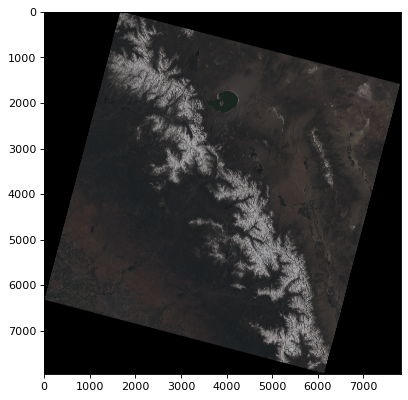

<AxesSubplot:>

In [5]:
from rasterio.plot import show


figure(figsize = (20, 6), dpi = 80)
show(normed_rgb)

We can see here that there is some snowy mountain range that crosses that top left to bottom right of the image. We expect the temperature to be low on this snowy surface

# 3. Bands needed from land surface temperature computation (Split window)
- Red: Band 4
- Near-Infrared (NIR): Band 5
- Thermal infrared 1: Band 10
- Thermal infrared 2: Band 11

Read band has already been loaded above

Here, I have used `rasterio` to load the images/bands needed.

In [6]:
nirband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(5)
tempband10 = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(10)
tempband11 = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(11)

In [7]:
with rasterio.open(url+nirband) as src:
    nirImage = src.read(1).astype('f4')
    
with rasterio.open(url+tempband10) as src:
    tempImage10 = src.read(1).astype('f4')

with rasterio.open(url+tempband11) as src:
    tempImage11 = src.read(1).astype('f4')

# 8. Compute land surface temperature

In [8]:
from pylandtemp import split_window

### Split window

Available methods to choose from include:

`'jiminez-munoz'`: Jiminez-Munoz et al, 2008 

`'kerr'`: Kerr Y et al, 2004

`'mc-clain'`: McMillin L. M. , 1975

`'price'`: Price J. C., 1984

`'sobrino-1993'`: Sobrino J. A. et al, 1993


In [9]:
method = 'jiminez-munoz'
lst_image_split_window = split_window(
    tempImage10, 
    tempImage11, 
    redImage, 
    nirImage, 
    lst_method=method, 
    emissivity_method='avdan',
    unit='celcius'
)

##### Visualize the  Land Surface Temperature obtained

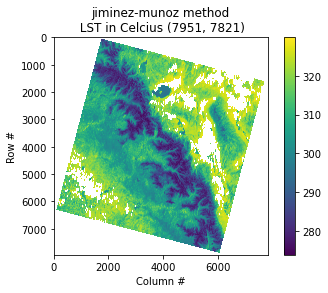

In [10]:
plt.imshow(lst_image_split_window, cmap='viridis')
plt.colorbar()
plt.title('{}\n LST in Celcius {}'.format(f'{method} method', lst_image_split_window.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()